Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.

Import pandas and matplotlib into the environment.
Run the Jupyter magic %matplotlib inline so that plots are displayed inline.
Read the dataset into a DataFrame and start exploring the data.

Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads.
Use DataFrame.iloc[] to return the first row formatted as a table.
Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
Use DataFrame.describe() to generate summary statistics for all of the numeric columns.
Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

Look up the number of rows in recent_grads and assign the value to raw_data_count.
Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.
Look up the number of rows in recent_grads now and assign the value to cleaned_data_count. If you compare cleaned_data_count and raw_data_count, you'll notice that only one row contained missing values and was dropped.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.iloc[0])
recent_grads.head()
recent_grads.tail()

# Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.

recent_grads = recent_grads.dropna()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


We use the **kind parameter to specify the type of plot** we want. We use **x and y to specify the data we want on each axis.** You can read about the different parameters in the documentation.

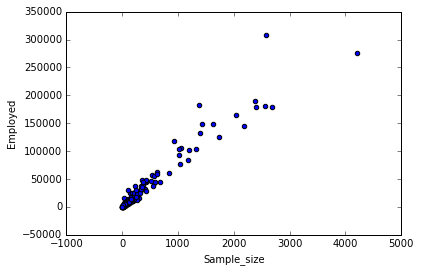

In [8]:
recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter')

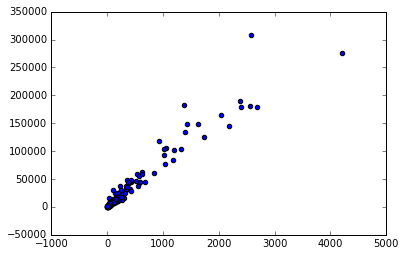

In [10]:
fig, ax = plt.subplots()

ax.scatter(recent_grads['Sample_size'], recent_grads['Employed'])

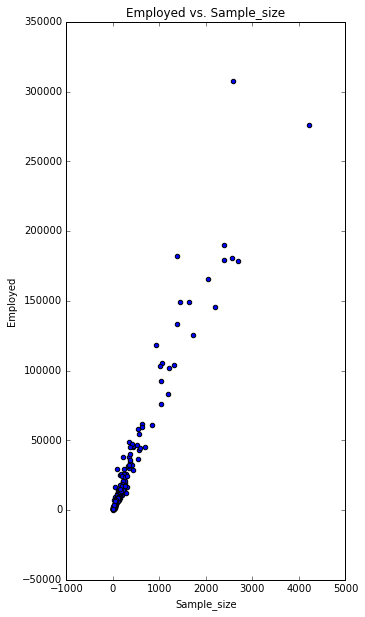

In [12]:
recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter', title = 'Employed vs. Sample_size', figsize=(5,10))

In [ ]:
We can access the underlying matplotlib Axes object by assigning the return value to a variable:

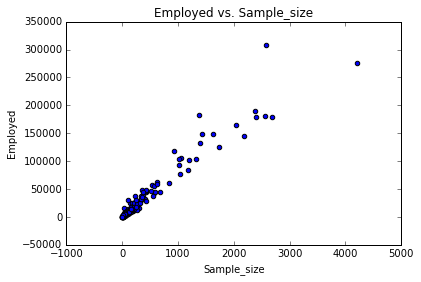

In [13]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

ax.set_title('Employed vs. Sample_size')

When you run the code above in a jupyter notebook cell, the plot will be returned inline just like before.

Generate scatter plots in separate jupyter notebook cells to explore the following relations:
Sample_size and Median
Sample_size and Unemployment_rate
Full_time and Median
ShareWomen and Unemployment_rate
Men and Median
Women and Median
Use the plots to explore the following questions:
Do students in more popular majors make more money?
Do students that majored in subjects that were majority female make more money?
Is there any link between the number of full-time employees and median salary?

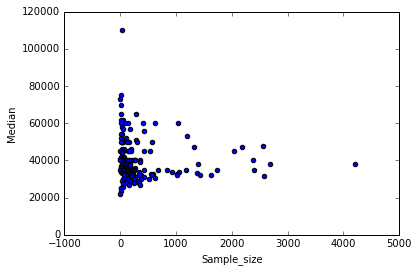

In [14]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')

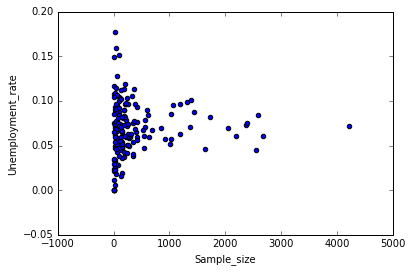

In [15]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')

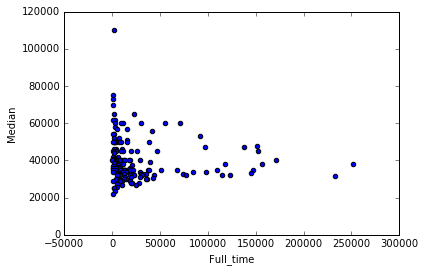

In [16]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter')

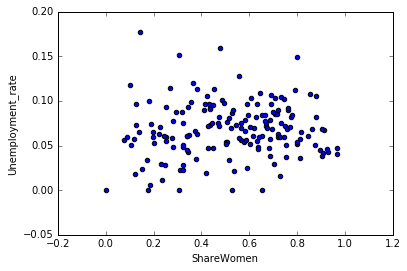

In [17]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter')

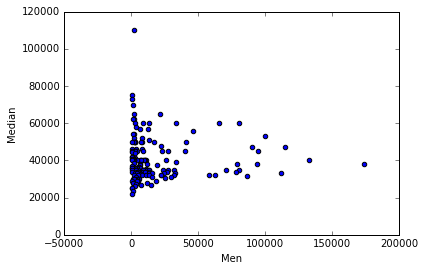

In [18]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter')

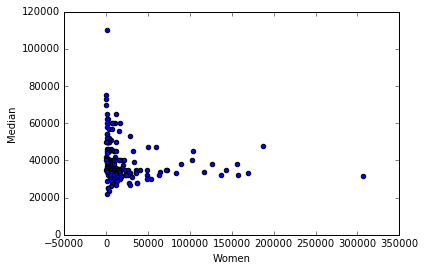

In [19]:
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter')

To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist:

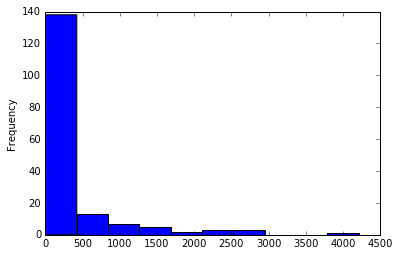

In [20]:
recent_grads['Sample_size'].plot(kind = 'hist')

The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

If you've looked at the documentation for Series.plot(), you'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using Series.hist(), which contains parameters specific to customizing histograms:

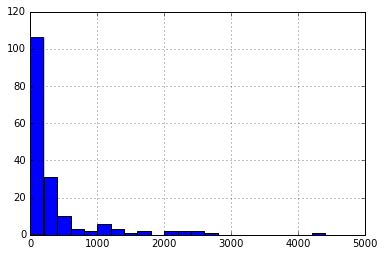

In [21]:
recent_grads['Sample_size'].hist(bins = 25, range = (0,5000))

Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
Sample_size
Median
Employed
Full_time
ShareWomen
Unemployment_rate
Men
Women
We encourage you to experiment with different bin sizes and ranges when generating these histograms.
Use the plots to explore the following questions:
What percent of majors are predominantly male? Predominantly female?
What's the most common median salary range?


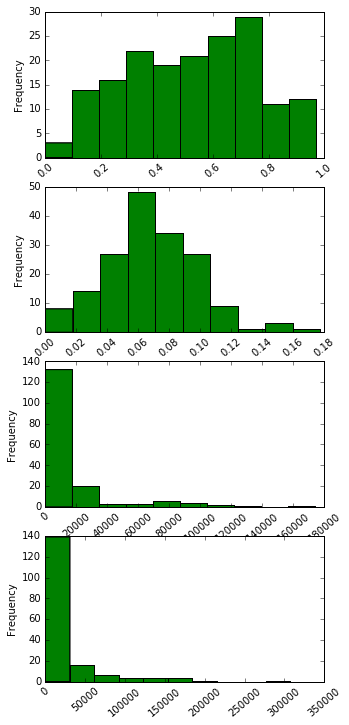

In [33]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize = (5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax.hist(recent_grads[cols[r]])
    ax = recent_grads[cols[r]].plot(kind = 'hist', rot = 40)
# ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
# ax.set_title('Employed vs. Sample_size')
    
plt.show()

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

In [35]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd2764cef0>,
      dtype=object)

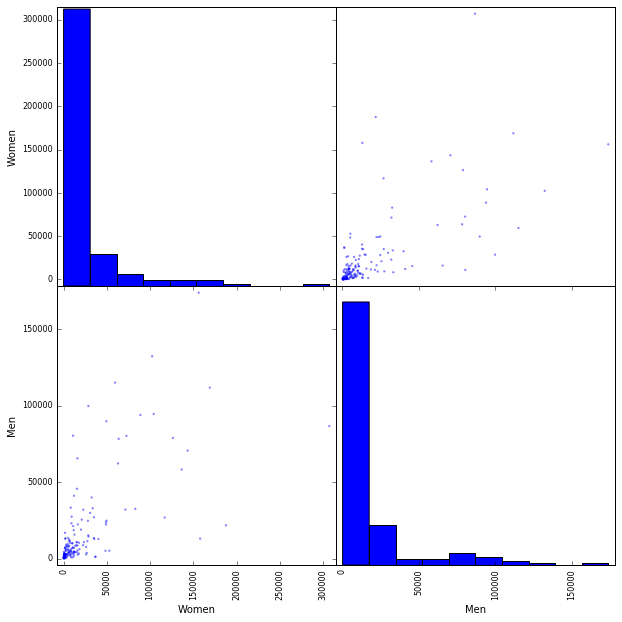

In [36]:
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10)) #shorthand column select

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd2731fb38>,
      dtype=object)

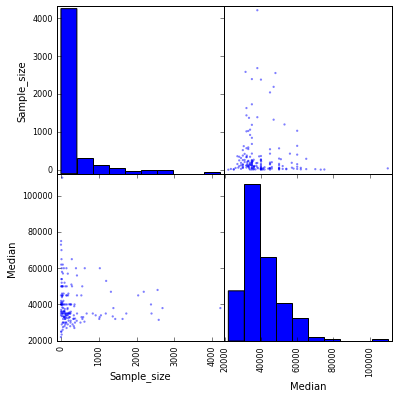

In [37]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd271ba240>,
      dtype=object)

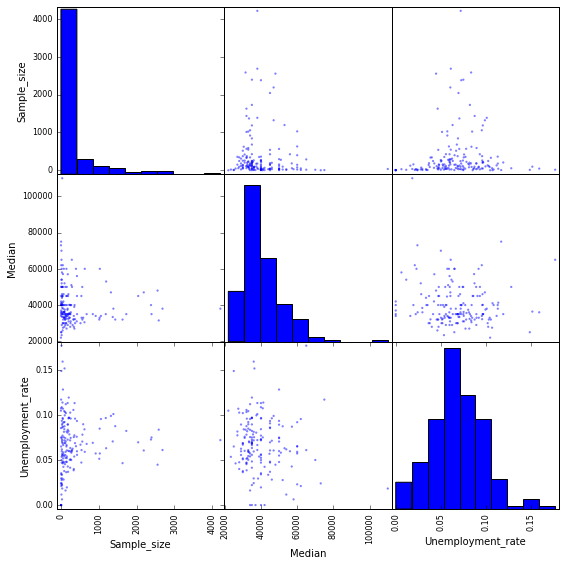

In [39]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize = (9,9))

To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

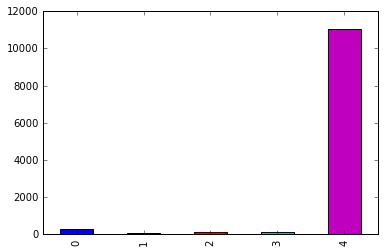

In [40]:
recent_grads[:5]['Women'].plot(kind = 'bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

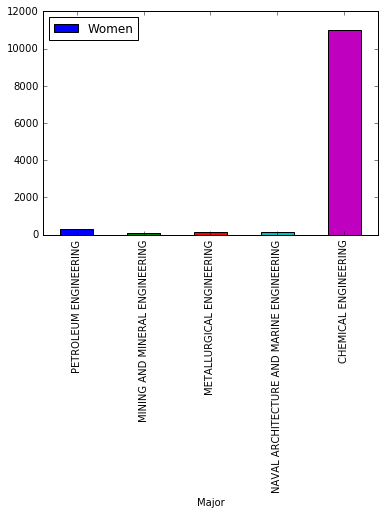

In [41]:
recent_grads[:5].plot.bar(x='Major', y='Women')

Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.
Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

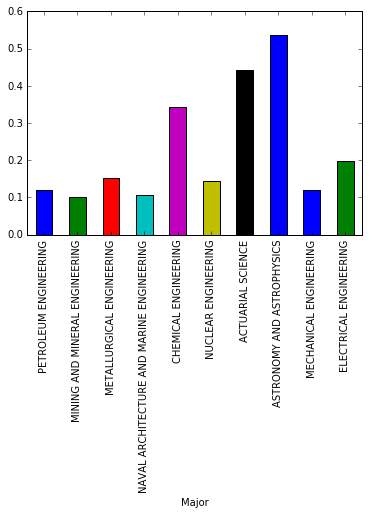

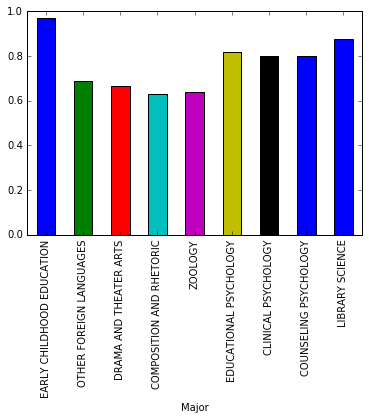

In [44]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)
recent_grads[163:].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)